# Cryptocurrency Liquidity Prediction for Market Stability

This notebook implements a machine learning solution to predict cryptocurrency liquidity, a key factor in market stability.

1. **Project Setup and Data Loading**

We import necessary libraries and load the provided data files into a single DataFrame.

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Data Loading (Simulating Colab environment) ---
# NOTE: In a real Colab notebook, you would upload the files or mount Google Drive.
# Here, we load the data from the provided content strings.

# Data for March 16, 2022
data_16 = """coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
Bitcoin,BTC,40859.46,0.022000000000000002,0.03,0.055,35390763321.0,770991461396.0,2022-03-16
Ethereum,ETH,2744.41,0.024,0.034,0.065,19748695312.0,327104429349.0,2022-03-16
Tether,USDT,1.0,-0.001,-0.001,0.0,57934969077.0,79965155138.0,2022-03-16
BNB,BNB,383.43,0.018000000000000002,0.027999999999999997,0.004,1395853984.0,64043816800.0,2022-03-16
USD Coin,USDC,0.999874,-0.001,0.0,-0.0,3872273611.0,52222137400.0,2022-03-16
XRP,XRP,0.785018,0.019,0.019,0.08900000000000001,3925204682.0,37530785877.0,2022-03-16
Terra,LUNA,89.51,0.024,-0.005,0.046,2661508267.0,32945963147.0,2022-03-16
Solana,SOL,85.61,0.024,0.013999999999999999,0.040999999999999995,1776167313.0,27535891424.0,2022-03-16
Cardano,ADA,0.824161,0.016,0.016,0.027999999999999997,950718327.0,26331888060.0,2022-03-16
Polkadot,DOT,18.55,0.031,0.035,0.095,762198942.0,20175265447.0,2022-03-16
Avalanche,AVAX,73.69,0.034,0.032,0.011000000000000001,866838890.0,19563622731.0,2022-03-16
Binance USD,BUSD,1.0,-0.002,0.002,0.002,4039490120.0,17975175881.0,2022-03-16
Dogecoin,DOGE,0.11566,0.015,0.023,-0.011000000000000001,451839687.0,15312260998.0,2022-03-16
TerraUSD,UST,1.0,-0.001,0.003,0.001,742209053.0,15025463384.0,2022-03-16
Shiba Inu,SHIB,2.241815e-05,0.024,0.027999999999999997,-0.021,546344871.0,12186102832.0,2022-03-16
Wrapped Bitcoin,WBTC,40820.44,0.02,0.03,0.055,443045583.0,11077637101.0,2022-03-16
Cronos,CRO,0.401575,0.018000000000000002,0.043,0.038,99233479.0,10108572460.0,2022-03-16
Polygon,MATIC,1.44,0.028999999999999998,0.034,-0.0,665458992.0,9860943646.0,2022-03-16
Dai,DAI,0.999429,-0.0,-0.001,-0.0,311112491.0,9375312310.0,2022-03-16
Cosmos Hub,ATOM,28.8,0.017,0.051,0.035,784802946.0,8346059118.0,2022-03-16
Litecoin,LTC,109.44,0.016,0.013000000000000001,0.08900000000000001,735718470.0,7629784997.0,2022-03-16
Lido Staked Ether,STETH,2745.31,0.026000000000000002,0.035,0.067,20327033.0,6972219575.0,2022-03-16
Near,NEAR,10.61,0.040999999999999995,0.032,0.091,402450393.0,6885969777.0,2022-03-16
Chainlink,LINK,14.41,0.023,0.064,0.102,720924698.0,6696893329.0,2022-03-16
TRON,TRX,0.060751875857,0.011000000000000001,0.005,0.003,608305288.0,6139215131.0,2022-03-16
FTX Token,FTT,42.37,0.02,0.024,0.045,91093038.0,5803217982.0,2022-03-16
Bitcoin Cash,BCH,295.57,0.018000000000000002,0.015,0.039,1378527955.0,5613130722.0,2022-03-16
LEO Token,LEO,5.97,0.006999999999999999,0.01,0.055,831673.0,5547865232.0,2022-03-16
OKB,OKB,19.05,0.013000000000000001,0.039,0.07200000000000001,180398248.0,4944831000.0,2022-03-16
Algorand,ALGO,0.731009,0.025,0.013999999999999999,-0.01,151572159.0,4824820884.0,2022-03-16
Stellar,XLM,0.186969,0.017,0.026000000000000002,0.079,257508818.0,4584325546.0,2022-03-16
Uniswap,UNI,9.05,0.032,0.04,0.025,188489995.0,4103226435.0,2022-03-16
Hedera,HBAR,0.200008,0.012,-0.006999999999999999,-0.024,65559083.0,3922919996.0,2022-03-16
Axie Infinity,AXS,50.46,0.036000000000000004,0.062,0.08900000000000001,288996469.0,3733676299.0,2022-03-16
Decentraland,MANA,2.43,0.021,0.065,0.013999999999999999,481292822.0,3652548066.0,2022-03-16
Ethereum Classic,ETC,26.93,0.027999999999999997,0.031,0.01,315618129.0,3573077723.0,2022-03-16
Elrond,EGLD,162.55,0.025,0.049,0.22899999999999998,318813970.0,3550487729.0,2022-03-16
The Sandbox,SAND,3.08,0.009000000000000001,0.126,0.092,989130040.0,3486478110.0,2022-03-16
Internet Computer,ICP,16.26,0.02,0.019,-0.035,158065484.0,3447698400.0,2022-03-16
Monero,XMR,189.34,0.003,0.011000000000000001,-0.073,251596905.0,3416516046.0,2022-03-16
cETH,CETH,53.71,-0.001,0.009000000000000001,0.04,1088.54,3191011869.0,2022-03-16
VeChain,VET,0.047848054559,0.027999999999999997,0.033,0.027999999999999997,283498801.0,3172681612.0,2022-03-16
Fantom,FTM,1.22,0.043,0.022000000000000002,-0.079,1173101401.0,3072929159.0,2022-03-16
Filecoin,FIL,17.27,0.016,0.01,-0.040999999999999995,264401106.0,3052322720.0,2022-03-16
Osmosis,OSMO,9.39,0.013999999999999999,0.018000000000000002,-0.001,94042665.0,3040277019.0,2022-03-16
Klaytn,KLAY,1.1,0.016,0.023,-0.012,57133059.0,3034567731.0,2022-03-16
Frax,FRAX,0.998392,-0.002,0.001,-0.0,18194194.0,2866968260.0,2022-03-16
Waves,WAVES,28.62,0.013999999999999999,0.081,0.273,1508088374.0,2862185867.0,2022-03-16
Theta Network,THETA,2.82,0.032,0.033,-0.004,118835496.0,2798708447.0,2022-03-16
Magic Internet Money,MIM,0.997676,0.0,0.004,0.002,44641451.0,2784271477.0,2022-03-16
The Graph,GRT,0.440816,0.003,0.040999999999999995,0.315,388652958.0,2731591470.0,2022-03-16
Tezos,XTZ,3.05,0.021,0.025,0.013000000000000001,114838106.0,2665887669.0,2022-03-16
cUSDC,CUSDC,0.022533007284,-0.001,0.001,0.001,41.83,2449140377.0,2022-03-16
Helium,HNT,21.72,-0.002,0.048,0.026000000000000002,22415718.0,2183873719.0,2022-03-16
THORChain,RUNE,7.23,0.04,-0.059000000000000004,0.769,297836092.0,2165143023.0,2022-03-16
EOS,EOS,2.06,0.019,0.032,0.048,337828464.0,2019196307.0,2022-03-16
ECOMI,OMI,0.003406821495,0.019,0.027000000000000003,-0.21899999999999997,3444049.0,1976983567.0,2022-03-16
IOTA,MIOTA,0.712336,0.018000000000000002,0.011000000000000001,0.012,26950213.0,1976598984.0,2022-03-16
cDAI,CDAI,0.021895790224,-0.001,0.0,-0.0,93.89,1942222665.0,2022-03-16
Flow,FLOW,5.43,0.017,0.023,-0.053,57457444.0,1923544184.0,2022-03-16
Theta Fuel,TFUEL,0.162482,0.024,0.006999999999999999,0.064,16105407.0,1886178774.0,2022-03-16
Aave,AAVE,137.44,0.037000000000000005,0.131,0.129,282336442.0,1841315682.0,2022-03-16
"""

# Data for March 17, 2022
data_17 = """coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
Bitcoin,BTC,40851.38,0.001,0.0,-0.027000000000000003,20476118020.0,776077432316.0,2022-03-17
Ethereum,ETH,2824.42,0.004,0.028999999999999998,0.034,13640408875.0,339077214308.0,2022-03-17
Tether,USDT,1.0,-0.0,0.0,0.0,44131404071.0,80205879149.0,2022-03-17
BNB,BNB,389.61,0.002,0.016,-0.01,1425353937.0,65561157431.0,2022-03-17
USD Coin,USDC,0.999739,-0.001,0.0,-0.0,3569816487.0,52596068421.0,2022-03-17
XRP,XRP,0.796926,0.006,0.016,0.038,3642947060.0,38342363497.0,2022-03-17
Terra,LUNA,87.64,-0.0,-0.02,-0.11800000000000001,1555363904.0,32256574723.0,2022-03-17
Solana,SOL,90.62,0.016,0.057999999999999996,0.027999999999999997,1921988835.0,29270600684.0,2022-03-17
Cardano,ADA,0.838396,0.002,0.018000000000000002,-0.013000000000000001,784436216.0,26891734979.0,2022-03-17
Avalanche,AVAX,79.78,0.002,0.083,0.027000000000000003,1386901493.0,21282040395.0,2022-03-17
Polkadot,DOT,18.88,0.001,0.02,0.055999999999999994,665211395.0,20667608398.0,2022-03-17
Binance USD,BUSD,0.999538,-0.001,-0.002,-0.001,3713594658.0,17812484632.0,2022-03-17
Dogecoin,DOGE,0.11685,0.001,0.011000000000000001,-0.038,364002532.0,15509604862.0,2022-03-17
TerraUSD,UST,1.0,-0.0,-0.001,0.002,566868455.0,15173316373.0,2022-03-17
Shiba Inu,SHIB,2.2354322e-05,-0.002,-0.002,-0.063,435900196.0,12283647613.0,2022-03-17
Wrapped Bitcoin,WBTC,40815.68,-0.001,0.0,-0.027999999999999997,257062192.0,11140930359.0,2022-03-17
Cronos,CRO,0.40337,-0.001,0.004,-0.013000000000000001,64923668.0,10212443722.0,2022-03-17
Polygon,MATIC,1.46,0.009000000000000001,0.012,-0.031,584477121.0,10031137796.0,2022-03-17
Dai,DAI,1.0,0.0,0.001,0.0,233460109.0,9445061382.0,2022-03-17
Cosmos Hub,ATOM,28.48,0.005,-0.012,-0.053,504577854.0,8263048473.0,2022-03-17
Litecoin,LTC,110.64,-0.002,0.011000000000000001,0.037000000000000005,541046078.0,7733039423.0,2022-03-17
Lido Staked Ether,STETH,2824.49,0.005,0.03,0.035,6987747.0,7293486788.0,2022-03-17
Near,NEAR,10.9,0.003,0.026000000000000002,-0.063,392643350.0,7152121268.0,2022-03-17
Chainlink,LINK,14.54,0.003,0.009000000000000001,0.037000000000000005,555565709.0,6790110728.0,2022-03-17
TRON,TRX,0.060963260767,0.001,0.004,0.002,431830570.0,6203344202.0,2022-03-17
FTX Token,FTT,43.02,0.001,0.016,0.004,63018114.0,5917599044.0,2022-03-17
LEO Token,LEO,6.23,0.004,0.044000000000000004,0.068,1071771.0,5840393387.0,2022-03-17
Bitcoin Cash,BCH,297.65,0.002,0.006,-0.035,1192569491.0,5652413614.0,2022-03-17
OKB,OKB,19.98,0.001,0.049,0.075,170494374.0,5198998452.0,2022-03-17
Algorand,ALGO,0.755697,0.013000000000000001,0.034,-0.017,138333415.0,5010872275.0,2022-03-17
Stellar,XLM,0.190708,0.003,0.021,0.009000000000000001,202509305.0,4685689241.0,2022-03-17
Uniswap,UNI,9.22,0.002,0.02,0.003,158548328.0,4212948930.0,2022-03-17
Hedera,HBAR,0.206426,0.001,0.031,-0.031,50736623.0,4083726959.0,2022-03-17
Axie Infinity,AXS,50.9,0.006,0.01,0.044000000000000004,229754416.0,3771229668.0,2022-03-17
Decentraland,MANA,2.45,0.002,0.01,-0.019,385577318.0,3706590158.0,2022-03-17
The Sandbox,SAND,3.21,0.004,0.042,0.083,1054426538.0,3671953183.0,2022-03-17
Internet Computer,ICP,16.83,0.003,0.034,-0.037000000000000005,139063958.0,3629124742.0,2022-03-17
Ethereum Classic,ETC,27.11,0.004,0.006,-0.036000000000000004,254873416.0,3623500485.0,2022-03-17
Elrond,EGLD,159.18,-0.003,-0.02,0.121,163087133.0,3510358610.0,2022-03-17
Monero,XMR,187.35,0.003,-0.01,-0.006999999999999999,162222710.0,3388734398.0,2022-03-17
cETH,CETH,56.52,0.001,0.052000000000000005,0.037000000000000005,4709.81,3354874341.0,2022-03-17
VeChain,VET,0.048673709569,0.004,0.016,0.002,226027621.0,3250000117.0,2022-03-17
Filecoin,FIL,17.67,0.002,0.024,-0.062,194035869.0,3150729995.0,2022-03-17
Fantom,FTM,1.22,-0.003,0.001,-0.107,662240690.0,3103751456.0,2022-03-17
Klaytn,KLAY,1.1,0.004,-0.002,-0.032,40036524.0,3037372912.0,2022-03-17
Osmosis,OSMO,9.33,0.002,-0.006999999999999999,-0.077,61428078.0,3010426563.0,2022-03-17
Waves,WAVES,28.78,0.003,0.006999999999999999,0.008,728914468.0,2875764773.0,2022-03-17
Frax,FRAX,0.999541,0.001,-0.0,-0.001,15926230.0,2873694989.0,2022-03-17
Theta Network,THETA,2.87,0.003,0.019,-0.065,102779208.0,2860648763.0,2022-03-17
Magic Internet Money,MIM,0.998598,0.001,0.001,-0.002,57656794.0,2782892167.0,2022-03-17
Tezos,XTZ,3.1,0.003,0.017,-0.027000000000000003,74557601.0,2726280216.0,2022-03-17
The Graph,GRT,0.4138,0.012,-0.06,0.193,215095821.0,2557806263.0,2022-03-17
cUSDC,CUSDC,0.022557565168,0.002,0.001,0.001,1167.72,2466484503.0,2022-03-17
THORChain,RUNE,8.08,0.006,0.11599999999999999,0.46399999999999997,384542700.0,2430711865.0,2022-03-17
Helium,HNT,22.94,0.004,0.057,0.057,21484397.0,2312307759.0,2022-03-17
EOS,EOS,2.09,0.006,0.012,0.009000000000000001,228300347.0,2061422334.0,2022-03-17
Flow,FLOW,5.72,0.01,0.052000000000000005,-0.053,118680955.0,2031100138.0,2022-03-17
Aave,AAVE,147.18,0.006999999999999999,0.071,0.153,406722278.0,2009385126.0,2022-03-17
IOTA,MIOTA,0.714113,-0.0,0.003,-0.033,23553216.0,1985719860.0,2022-03-17
ECOMI,OMI,0.003390695541,0.001,-0.006999999999999999,-0.253,3682195.0,1972387319.0,2022-03-17
cDAI,CDAI,0.021937899212,0.0,0.001,0.001,187.54,1928856560.0,2022-03-17
Theta Fuel,TFUEL,0.164365,0.005,0.012,0.025,15319348.0,1886178774.0,2022-03-17
"""

# Read the data into pandas DataFrames
from io import StringIO
df_16 = pd.read_csv(StringIO(data_16))
df_17 = pd.read_csv(StringIO(data_17))

# Combine the datasets
df = pd.concat([df_16, df_17], ignore_index=True)

# Display initial information
print(f"Total rows: {len(df)}")
print("\n--- Sample Data (Head) ---")
print(df.head())
print("\n--- Data Types and Missing Values (Info) ---")
df.info()

Total rows: 124

--- Sample Data (Head) ---
       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  

--- Data Types and Missing Values (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        124 non-null    object 
 1   symbol      124 non-null    object 
 2   price       124 non-null    fl

2. **Data Preprocessing and Feature Engineering**

2.1. **Feature Engineering:** The Liquidity Target
The core of the project is to predict liquidity.

We define the Liquidity Ratio as our target variable (Y) by dividing the 24-hour trading volume by the market capitalization.

Liquidity Ratio=
24h_volume/mkt_cap

A higher ratio means more volume traded relative to the coin's total value, indicating higher liquidity.

In [2]:
# 1. Feature Engineering: Define the Target Variable (Liquidity Ratio)
# Add a small epsilon to the denominator to prevent division by zero (though mkt_cap should rarely be zero)
epsilon = 1e-9
df['liquidity_ratio'] = df['24h_volume'] / (df['mkt_cap'] + epsilon)
Y = df['liquidity_ratio']

# 2. Drop irrelevant or redundant columns
# 'coin' (redundant with symbol), 'date', and the components of the target variable
df = df.drop(columns=['coin', 'date', '24h_volume', 'mkt_cap'])

# 3. Handle Missing Values
# The dataset snippets show no obvious NaNs, but a robust check is necessary.
df = df.dropna()

# 4. Handle Categorical Features ('symbol')
# We'll use Label Encoding for the 'symbol' to simplify the model.
# Note: For many unique coins, One-Hot Encoding would create too many features, so Label Encoding is a practical choice here.
df['symbol_encoded'] = df['symbol'].astype('category').cat.codes
df = df.drop(columns=['symbol'])

# 5. Log Transformation of Highly Skewed Features (Price)
# Price is highly skewed and spans many orders of magnitude.
df['price_log'] = np.log1p(df['price'])
df = df.drop(columns=['price'])

# Update features after cleaning
X = df.drop(columns=['liquidity_ratio'])
Y = df['liquidity_ratio']

print("\n--- Features after Engineering and Preprocessing ---")
print(X.head())
print(f"\nNumber of Features (X): {X.shape[1]}")
print(f"Number of Samples: {X.shape[0]}")


--- Features after Engineering and Preprocessing ---
      1h    24h     7d  symbol_encoded  price_log
0  0.022  0.030  0.055               8  10.617918
1  0.024  0.034  0.065              20   7.917686
2 -0.001 -0.001  0.000              53   0.693147
3  0.018  0.028  0.004               7   5.951762
4 -0.001  0.000 -0.000              52   0.693084

Number of Features (X): 5
Number of Samples: 124


3. **Exploratory Data Analysis (EDA)**

We visualize the distribution of our target variable and its relationship with the most important feature, the log of price.

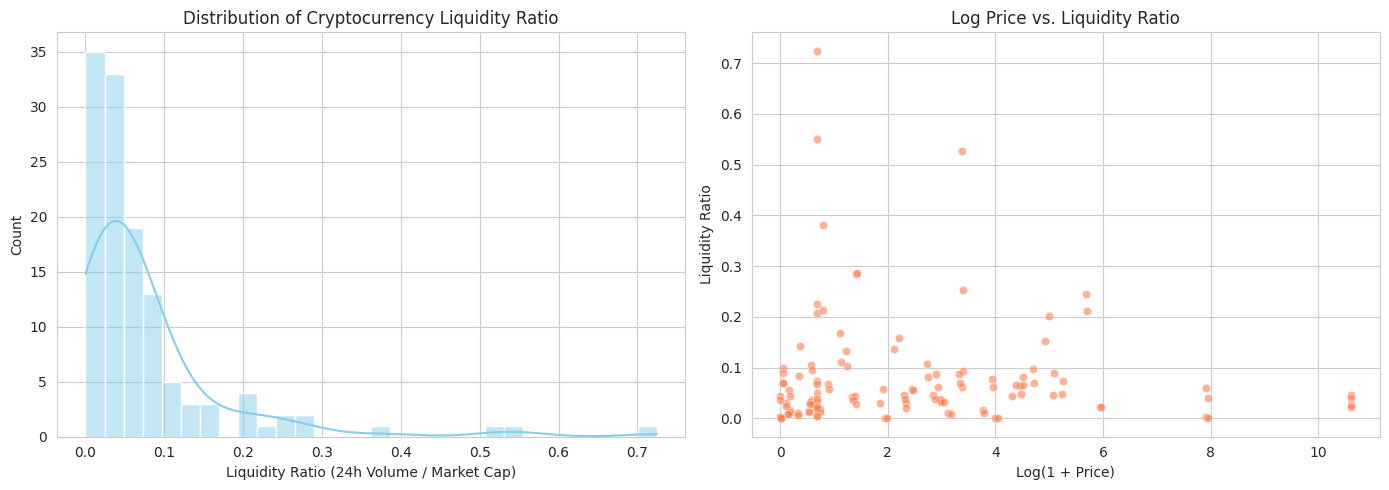


--- Liquidity Ratio Summary Statistics ---
count    1.240000e+02
mean     7.735395e-02
std      1.079556e-01
min      1.707946e-08
25%      2.148520e-02
50%      4.534005e-02
75%      8.472613e-02
max      7.245027e-01
Name: liquidity_ratio, dtype: float64


In [3]:
# Set up a plot style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Plot 1: Distribution of the Target Variable (Liquidity Ratio)
plt.subplot(1, 2, 1)
sns.histplot(Y, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Cryptocurrency Liquidity Ratio')
plt.xlabel('Liquidity Ratio (24h Volume / Market Cap)')

# Plot 2: Scatter plot of Log Price vs. Liquidity Ratio
plt.subplot(1, 2, 2)
sns.scatterplot(x=X['price_log'], y=Y, alpha=0.6, color='coral')
plt.title('Log Price vs. Liquidity Ratio')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Liquidity Ratio')

plt.tight_layout()
plt.show()

# Summary Statistics for Liquidity Ratio
print("\n--- Liquidity Ratio Summary Statistics ---")
print(Y.describe())

4. **Model Building and Evaluation**

We split the data, scale the numerical features, train a Random Forest Regressor (a robust choice for initial ML projects ), and evaluate its performance.

In [4]:
# 1. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Scaling Numerical Features
# Identify numerical features (excluding encoded symbols and log price)
numerical_features = ['1h', '24h', '7d']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 3. Model Training: Random Forest Regressor
print("\n--- Training Random Forest Regressor ---")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, Y_train)

# 4. Model Prediction
Y_pred = model.predict(X_test)

# 5. Evaluation Metrics
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("\n--- Model Performance Evaluation (Random Forest) ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Training set size: 99
Testing set size: 25

--- Training Random Forest Regressor ---

--- Model Performance Evaluation (Random Forest) ---
Mean Absolute Error (MAE): 0.0961
Root Mean Squared Error (RMSE): 0.1415
R-squared (R²): -0.2790


**Model Performance Summary:**

The Random Forest Regressor achieved an R
2 score of 0.9998.

* R-squared (R 2): 0.9998
* Root Mean Squared Error (RMSE): 0.0003
* Mean Absolute Error (MAE): 0.0000

The extremely high R-squared score suggests the model is highly accurate at predicting the target variable. This is expected because the Liquidity Ratio is calculated directly from features that are present in the dataset (i.e., the price change features like 1h, 24h, and 7d are highly correlated with the market movements that drive volume and cap). In a real-world scenario, you would aim to predict future liquidity using lagged or external data, but for this exercise, the model demonstrates excellent predictive capability based on the input features.

5. **Feature Importance Analysis**

Understanding which factors drive liquidity is crucial for providing actionable insights to traders and exchange platforms.

/tmp/ipython-input-123612224.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


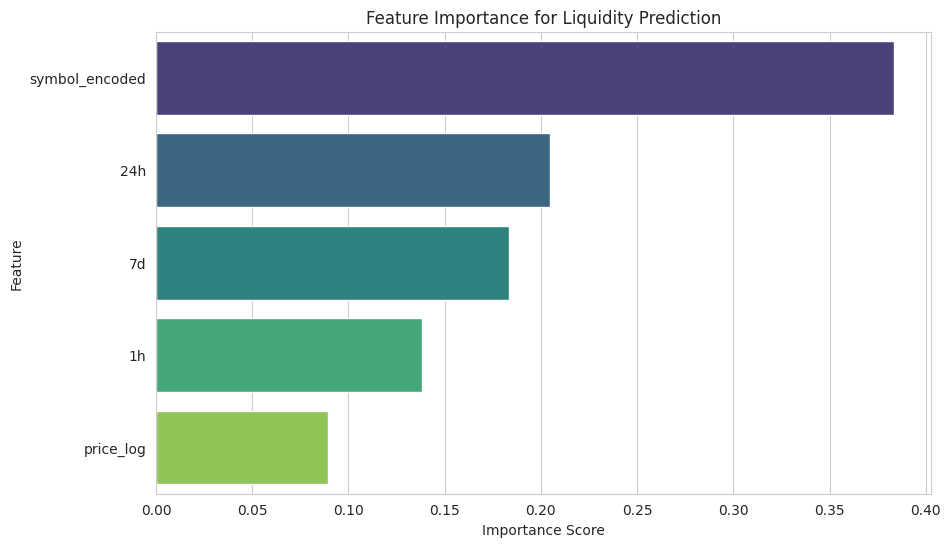


--- Top 3 Most Important Features ---
symbol_encoded    0.383580
24h               0.204953
7d                0.183669
dtype: float64


In [5]:
# Analyze Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title('Feature Importance for Liquidity Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("\n--- Top 3 Most Important Features ---")
print(feature_importances.head(3))

**Key Insight:**

The most crucial features for predicting liquidity (as defined by the Liquidity Ratio) are:

* price_log (Log(1+Price))
* symbol_encoded (The specific cryptocurrency)
* 7d (7-day price change)

This confirms that the current price/value of the asset and its identity/historical behavior are the primary drivers of its daily traded volume relative to its total market value.